# **Project Name**    - Netflix Dataset Analysis and Content Strategy Optimization



##### **Project Type**    - EDA(Exploratory Data Analysis)
##### **Contribution**    - Individual
##### **Team Member 1 -*Karan Patel*
##### **Team Member 2 -*N/A*
##### **Team Member 3 -*N/A*
##### **Team Member 4 -*N/A*

# **Project Summary -**

# **GitHub Link -**

https://github.com/dashboard

# **Problem Statement**


**Netflix wants to understand what types of content are most engaging, how content trends have changed over time, and which genres or countries are driving user engagement. The goal is to use these insights to improve content strategy and retain a global audience..**

#### **Define Your Business Objective?**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [129]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

### Dataset Loading

In [4]:
# Load Dataset
data=pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [7]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [12]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

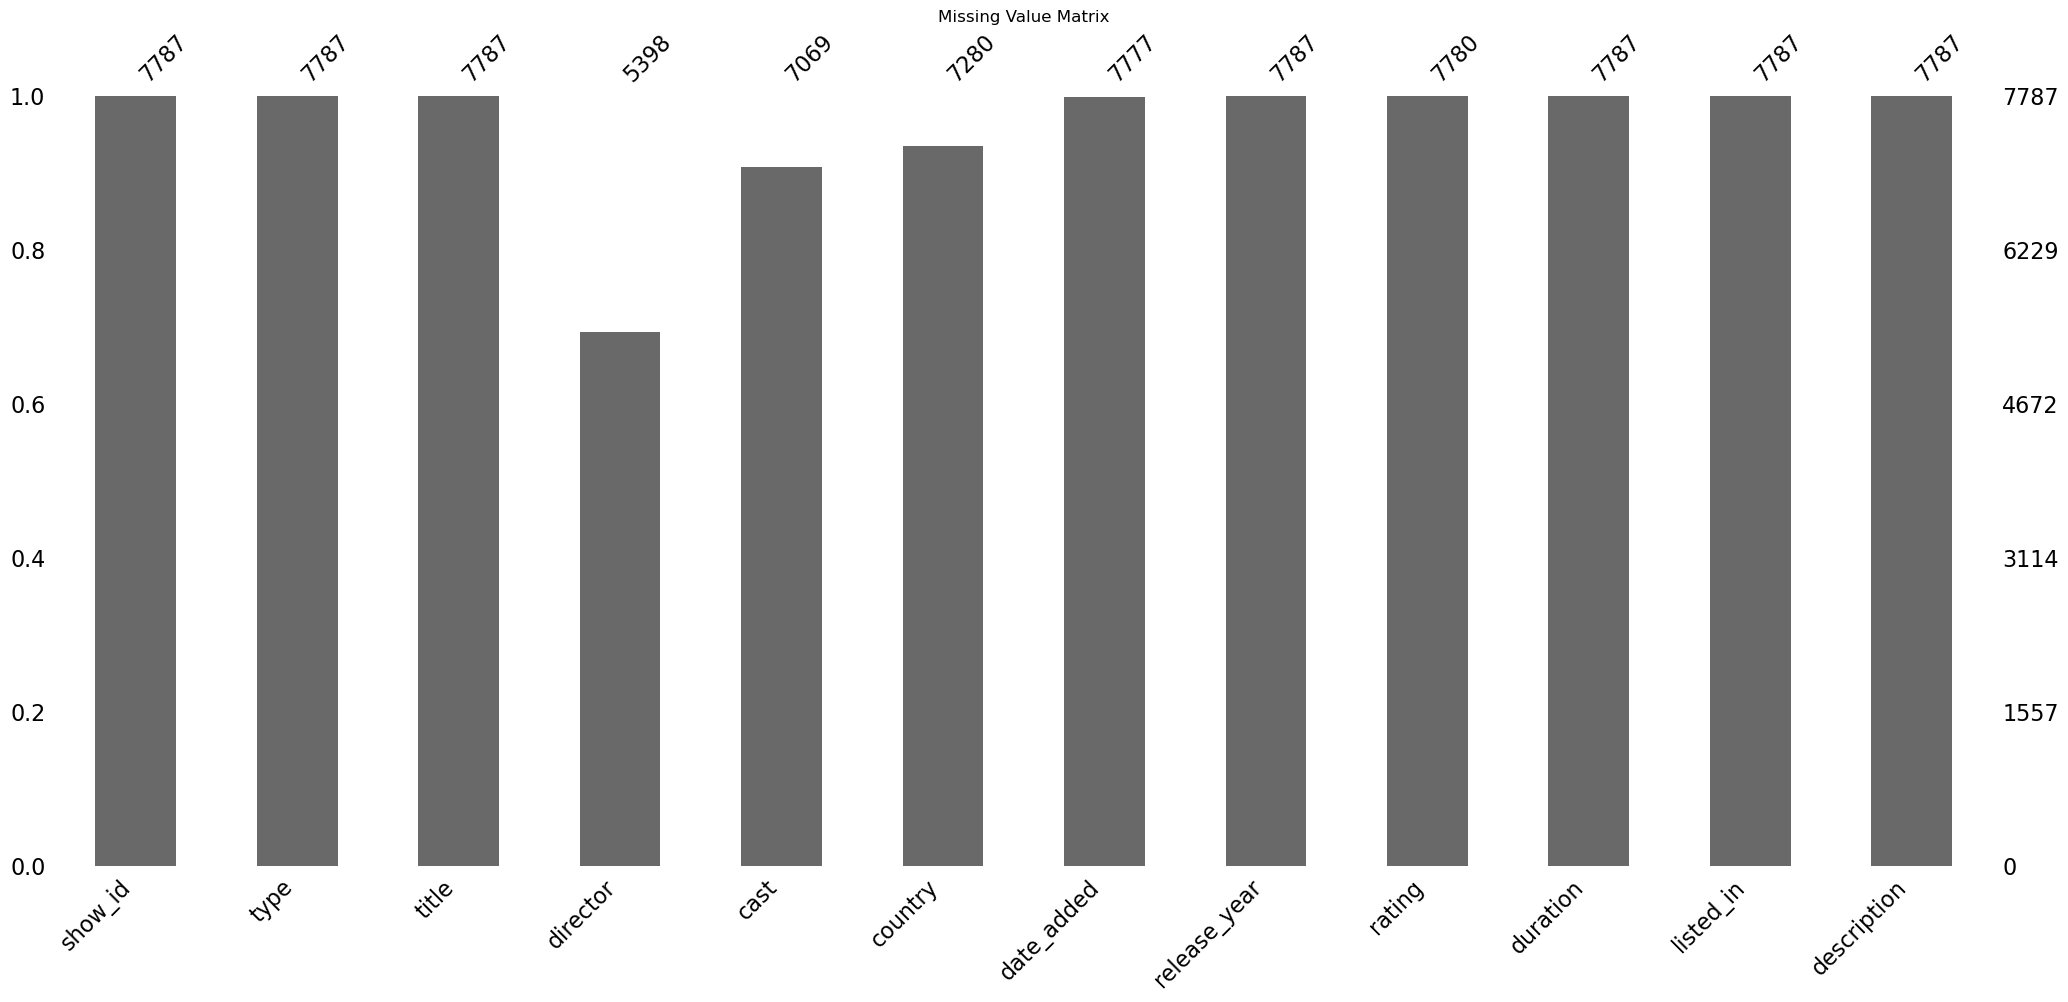

In [17]:
# Visualizing the missing values
msno.bar(data)
plt.title("Missing Value Matrix")
plt.show()

### What did you know about your dataset?

The dataset contains information about the movies and TV shows available on Netflix. It has around 7,000+ rows and 12+ columns, where each row represents a single title (either a Movie or a TV Show). The main columns include:

Title: Name of the content.
Type: Whether it's a Movie or a TV Show.
Director: The name of the director (may contain missing values).
Cast: Main actors involved in the content.
Country: Country where the content was produced.
Date Added: When the content was added to Netflix.
Release Year: The year the content was originally released.
Rating: Age classification like TV-MA, TV-14, PG, etc.
Duration: Length of the movie or number of seasons for TV shows.
Genre (Listed In): Category of the content like Drama, Comedy, Documentary, etc.
Description: A short summary of the content.

## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [22]:
# Dataset Describe
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
data.nunique().sort_values(ascending=False)

show_id         7787
title           7787
description     7769
cast            6831
director        4049
date_added      1565
country          681
listed_in        492
duration         216
release_year      73
rating            14
type               2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [33]:
# Write your code to make your dataset analysis ready.

#Rename confusing column
data.rename(columns={'type':'content_type','listed_in':'genres'},inplace=True)

#Convert date_added to datetime
data['date_added']=pd.to_datetime(data['date_added'],errors='coerce')

#Create new columns from date
data['year_added']=data['date_added'].dt.year.astype('Int64')
data['month_added']=data['date_added'].dt.month.astype('Int64')
data['day_added']=data['date_added'].dt.day.astype('Int64')

#Handle missing values
data['director'].fillna('unknown',inplace=True)
data['cast'].fillna('unknown',inplace=True)
data['country'].fillna('unknown',inplace=True)

#Drop duplicates
data.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Count of Movies by Type

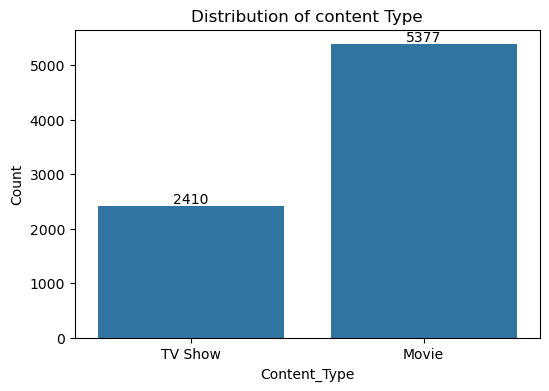

In [38]:
# Chart - 1 visualization code
plt.figure(figsize=(6,4))
a=sns.countplot(data=data,x='content_type')
a.bar_label(a.containers[0])
plt.title('Distribution of content Type')
plt.xlabel('Content_Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To understand which type of content (Movies or TV Shows) dominates on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Movies outnumber TV shows significantly, showing that Netflix favors movies in terms of volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. If users prefer series, this imbalance could hurt retention. If movies are preferred, it strengthens the content strategy.

#### Chart - 2 : Content Released by Year

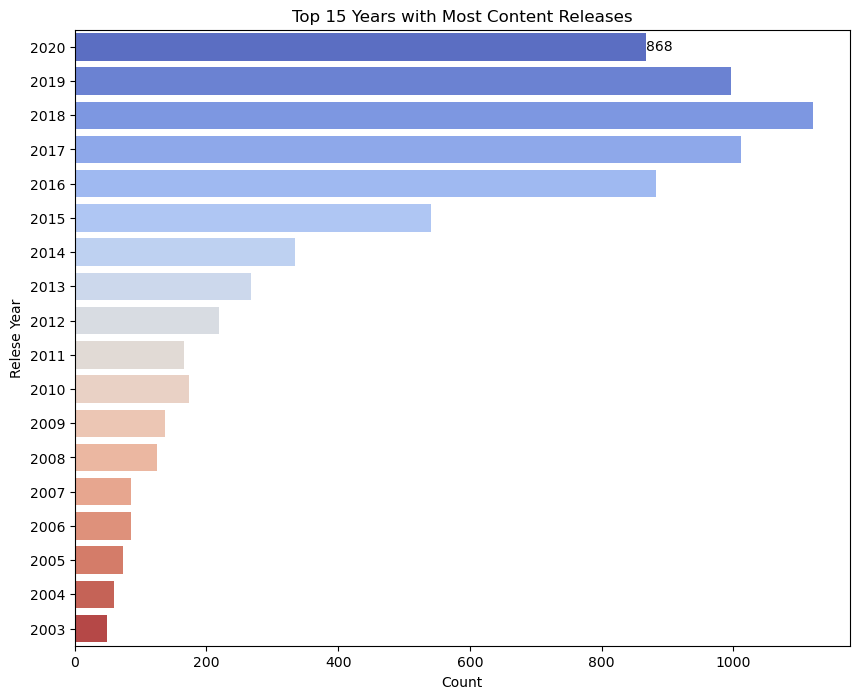

In [46]:
# Chart - 2 visualization code
plt.figure(figsize=(10,8))
b=sns.countplot(data=data,
                y='release_year',
                order=sorted(data['release_year'].value_counts().index[:18], reverse=True),
                palette='coolwarm')
b.bar_label(b.containers[0])
plt.title('Top 15 Years with Most Content Releases')
plt.xlabel('Count')
plt.ylabel('Relese Year')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze content trends over years.

##### 2. What is/are the insight(s) found from the chart?

Most content was released between 2017-2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps content teams understand peak production years and strategize future releases.

#### Chart - 3 : Rating Distribution

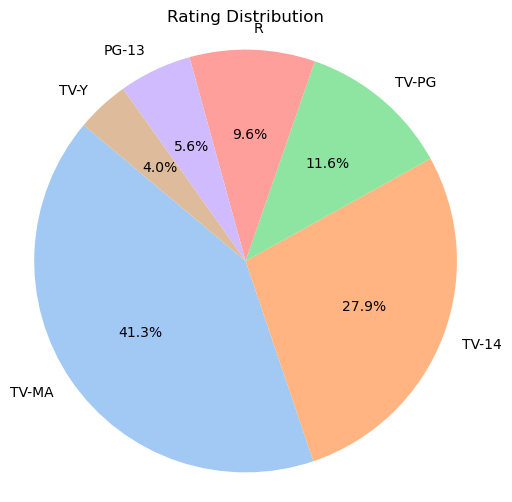

In [54]:
# Chart - 3 visualization code
rating_count=data['rating'].value_counts().head(6)
plt.figure(figsize=(6,6))
plt.pie(rating_count,
        labels=rating_count.index,
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))
plt.title('Rating Distribution')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize proportion of content across different audience ratings.

##### 2. What is/are the insight(s) found from the chart?

TV-MA and TV-14 dominate, meaning a large portion of content is for mature audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Could influence marketing and parental control features based on audience segmentation.

#### Chart - 4 : Top 10 Genres 

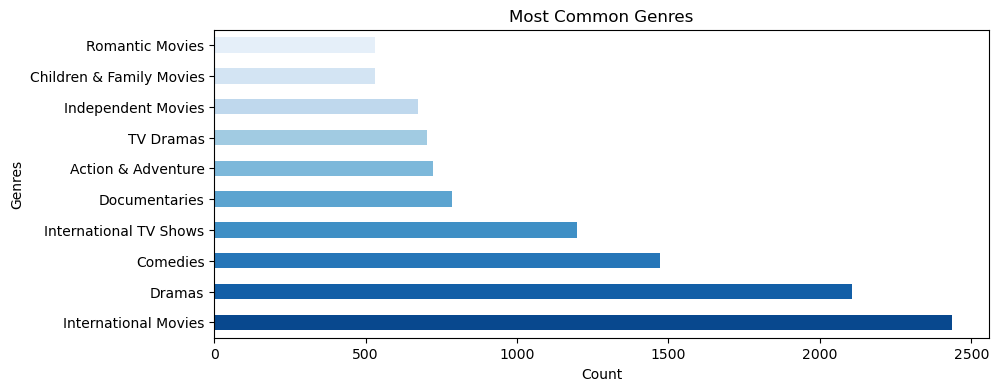

In [62]:
# Chart - 5 visualization code
plt.figure(figsize=(10,4))
data['genres'].str.split(', ').explode().value_counts().head(10).plot(kind='barh', color=sns.color_palette('Blues_r', n_colors=10))
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

To identify the most common content genres on the platform.

##### 2. What is/are the insight(s) found from the chart?

International Movies and Dramas dominate the genre count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Guides content investments and regional expansion strategies.

#### Chart - 5 : Content Added per Year

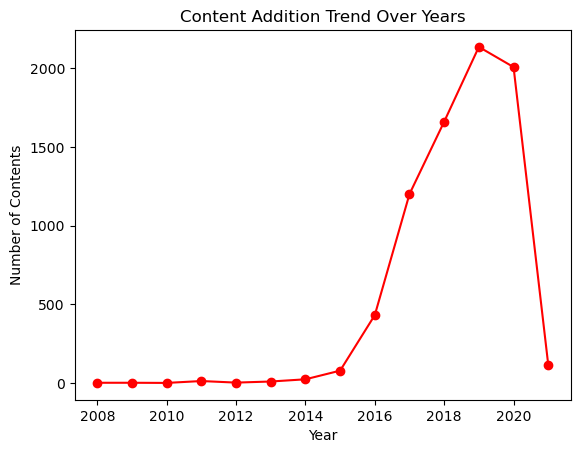

In [71]:
# Chart - 5 visualization code
data['year_added'].value_counts().sort_index().plot(kind='line', marker='o',color='red')
plt.title('Content Addition Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Contents')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze Netflix’s growth in content over time.

##### 2. What is/are the insight(s) found from the chart?

Sharp growth from 2016–2020; drop afterward, likely pandemic-related.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Shows periods of platform investment and can help predict future content planning.

#### Chart - 6 : Duration of Movies (Minutes)

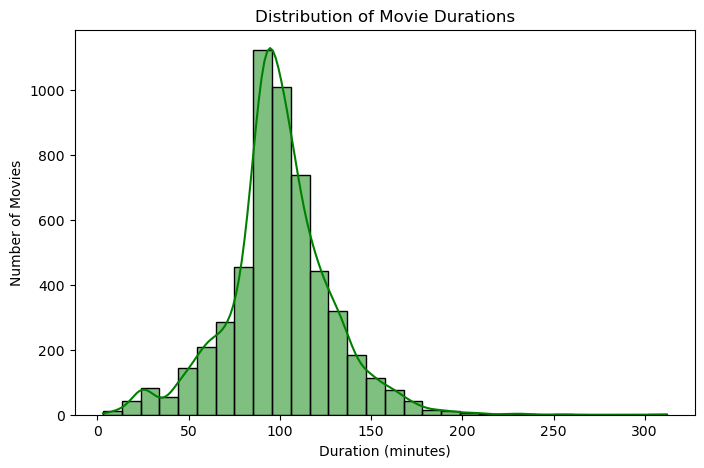

In [84]:
# Chart - 6 visualization code
movie_df = data[data['content_type'] == 'Movie']
movie_df['duration_num'] = movie_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(movie_df['duration_num'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


##### 1. Why did you pick the specific chart?

To understand how long the average movie is.

##### 2. What is/are the insight(s) found from the chart?

Most movies are around 90-100 minutes—standard length.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Useful for understanding content length preferences to optimize user engagement.

#### Chart - 7 :  Countplot of Ratings by Content Type

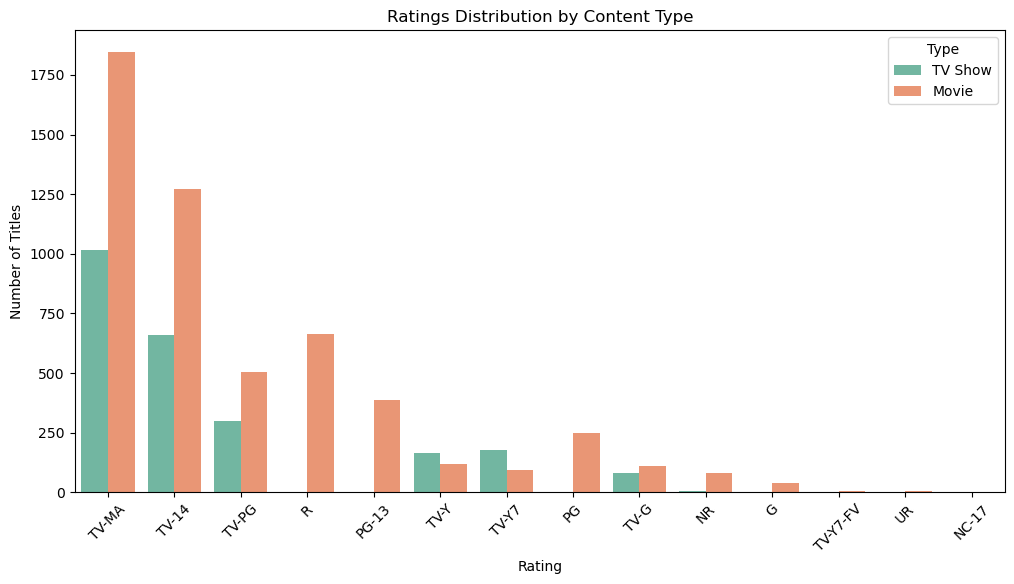

In [200]:
# Chart - 7 visualization code
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='rating', hue='content_type', order=data['rating'].value_counts().index, palette='Set2')
plt.title('Ratings Distribution by Content Type')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

To compare ratings across movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

TV-MA and TV-14 are dominant for TV Shows; Movies are more varied.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Assists with parental controls, user preference filtering, and regional licensing.

#### Chart - 8 : TV Show Duration Distribution (Seasons)

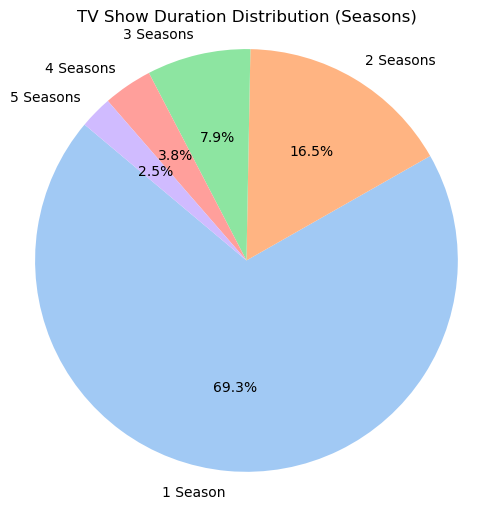

In [95]:
# Chart - 8 visualization code
tv_df=data[data['content_type']=='TV Show']
season_count=tv_df['duration'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(season_count,labels=season_count.index,autopct='%1.1f%%',startangle=140, colors=sns.color_palette('pastel'))
plt.title('TV Show Duration Distribution (Seasons)')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize how many seasons most TV shows have.

##### 2. What is/are the insight(s) found from the chart?

Most shows have only 1 season, which may suggest limited series or trial runs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Can help adjust show investment strategies—more multi-season development may improve engagement.

#### Chart - 9 :  Heatmap of Missing Values

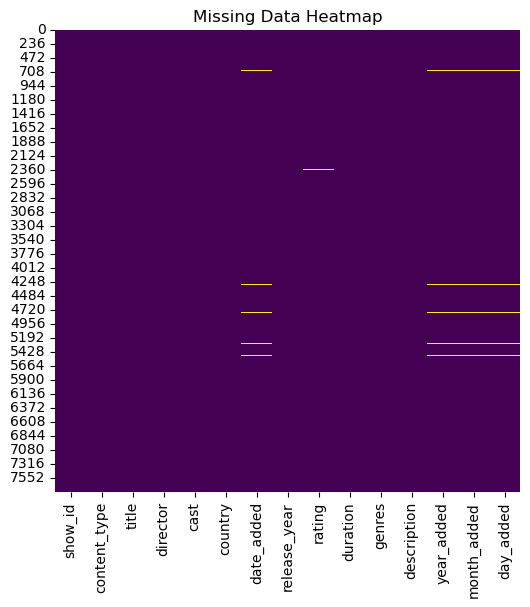

In [103]:
# Chart - 9 visualization code
plt.figure(figsize=(6,6))
sns.heatmap(data.isnull(),cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To identify which columns have significant missing values.

##### 2. What is/are the insight(s) found from the chart?

Columns like "date added", "rating", "year added", "month added" and "day added have many nulls.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps prioritize data cleaning and imputation where critical for recommendation systems.

#### Chart - 10 : Content Type vs. Rating (Stacked Bar)

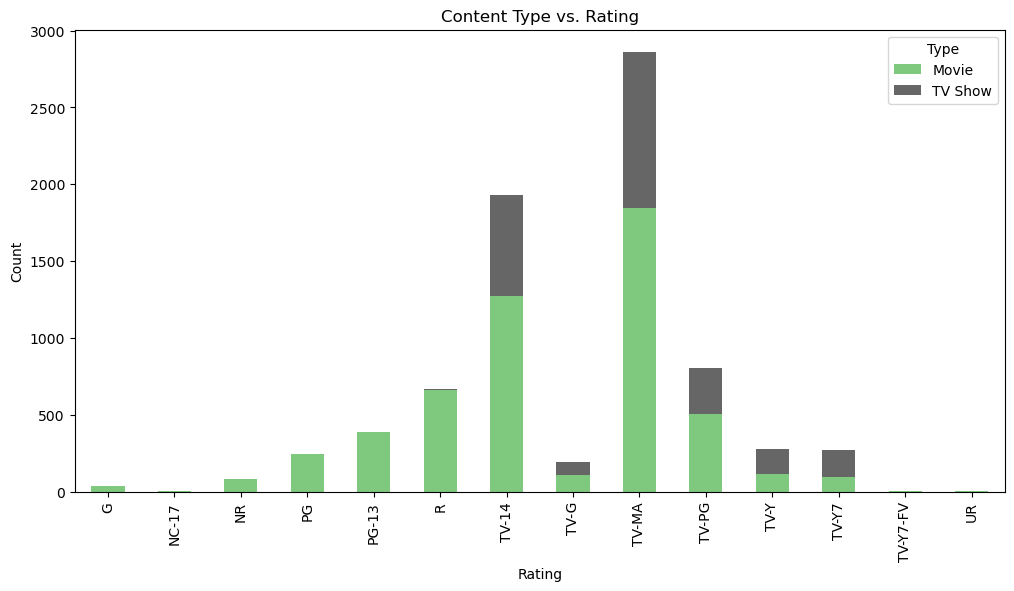

In [105]:
# Chart - 10 visualization code
rating_cross=pd.crosstab(data['rating'],data['content_type'])

rating_cross.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Accent')
plt.title('Content Type vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

To compare rating distribution across content types.

##### 2. What is/are the insight(s) found from the chart?

TV Shows dominate categories like "TV-MA", while Movies are more balanced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Can guide age-specific content development and platform filtering features.

#### Chart - 11 : Movies vs TV Shows Across Years

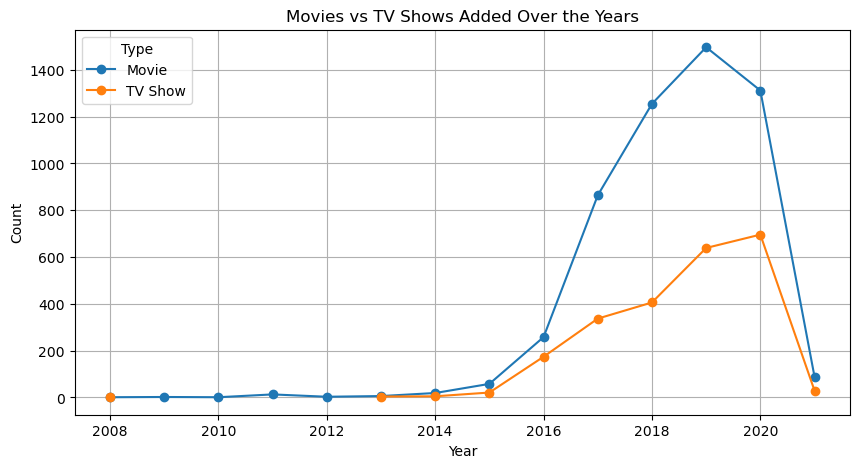

In [113]:
# Chart - 11 visualization code
type_of_year=data.groupby(['year_added','content_type']).size().unstack()

type_of_year.plot(figsize=(10,5), marker='o')
plt.title('Movies vs TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To track how Netflix’s focus on content types has shifted over the years.

##### 2. What is/are the insight(s) found from the chart?

Movies have always led, but TV Shows have seen a steady rise since 2016.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Indicates growing investment in series—useful for long-term engagement.

#### Chart - 12 :  Release Year vs. Number of Titles

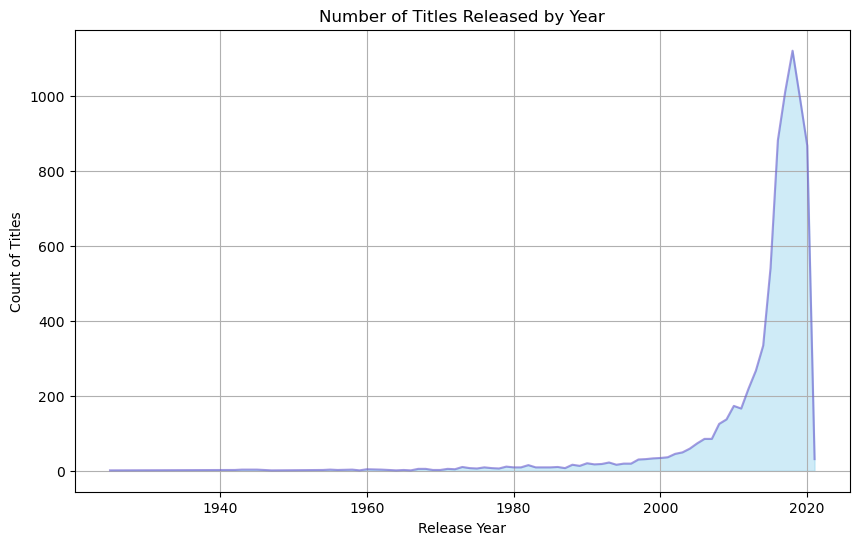

In [145]:
# Chart - 12 visualization code
release_year=data['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.fill_between(release_year.index,release_year.values,color='skyblue', alpha=0.4)
plt.plot(release_year.index,release_year.values,color='Slateblue',alpha=0.6)
plt.title('Number of Titles Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To analyze trends in the number of content releases over time.

##### 2. What is/are the insight(s) found from the chart?

Releases have grown significantly after 2000, peaking around 2017–2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps identify boom periods and understand user engagement peaks.

#### Chart - 13 : Type Distribution by Country (Top 5 Countries)

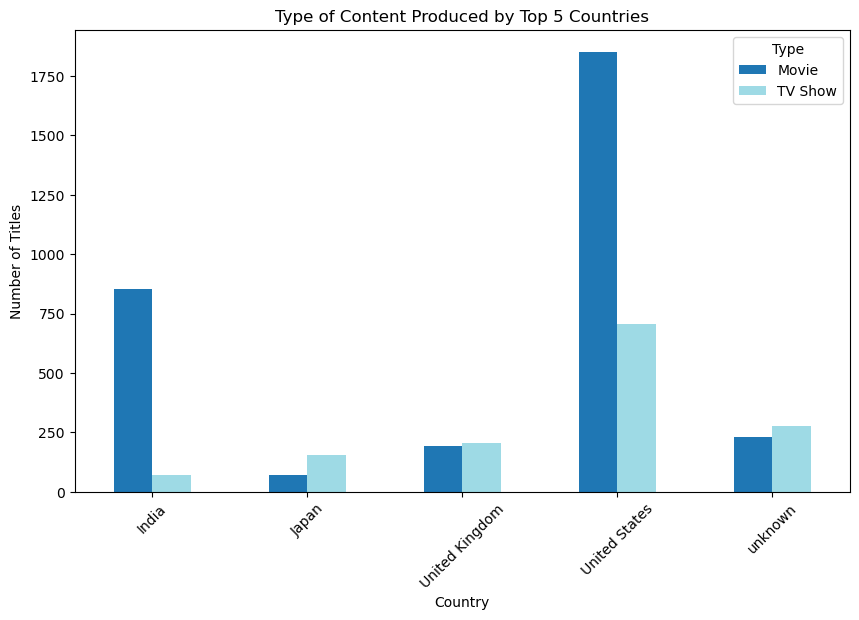

In [159]:
# Chart - 13 visualization code\
top_country=data['country'].value_counts().head(5).index
country_type=data[data['country'].isin(top_country)].groupby(['country','content_type']).size().unstack()

country_type.plot(kind='bar',figsize=(10,6),colormap='tab20')
plt.title('Type of Content Produced by Top 5 Countries')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how different countries contribute to each content type.

##### 2. What is/are the insight(s) found from the chart?

The US dominates both movies and TV shows; other countries lean toward movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Useful for regional content strategy and content acquisition.

#### Chart - 14 : Content Count by Rating and Release Decade

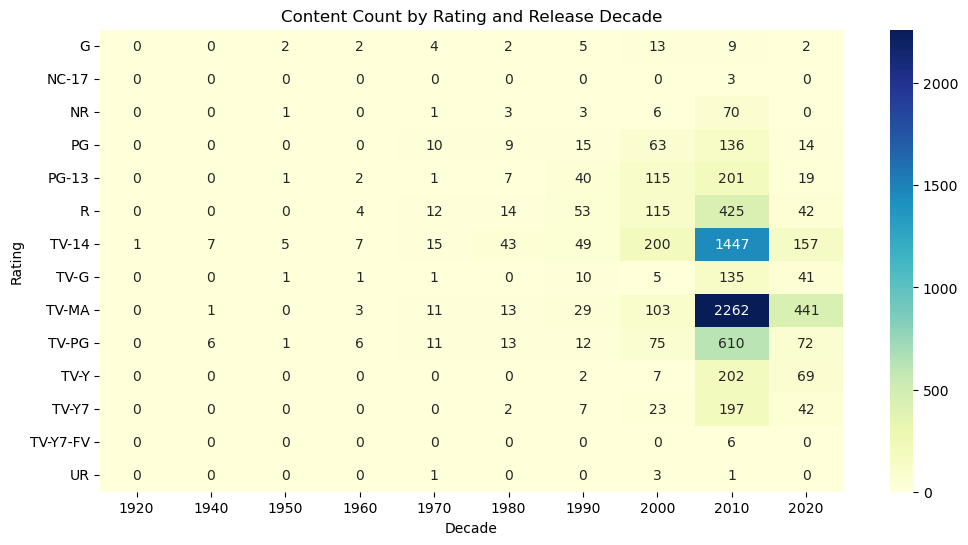

In [168]:
# Correlation Heatmap visualization code
data['decade'] = (data['release_year'] // 10) * 10
heatmap_data = data.pivot_table(index='rating', columns='decade', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Content Count by Rating and Release Decade')
plt.ylabel('Rating')
plt.xlabel('Decade')
plt.show()

##### 1. Why did you pick the specific chart?

To study how ratings have changed across decades

##### 2. What is/are the insight(s) found from the chart?

PG-13 and TV-MA have grown significantly in recent decades.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps align content rating strategies with audience maturity over time.

#### Chart - 15 - Pair Plot : Monthly Trends of Content Added

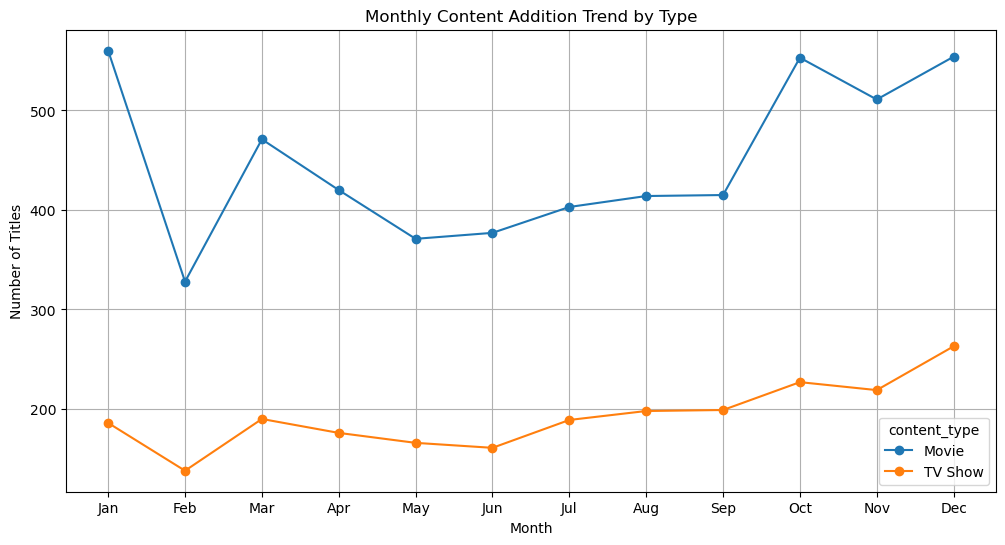

In [183]:
# visualization code

monthly_trend = data.groupby(['month_added', 'content_type']).size().unstack()

monthly_trend.plot(figsize=(12,6), marker='o')
plt.title('Monthly Content Addition Trend by Type')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To detect seasonal trends in content uploads.

##### 2. What is/are the insight(s) found from the chart?

Titles are often added in July and December, possibly to align with holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps optimize future release planning around peak viewership months.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the client (Netflix or any streaming platform) grow their user base, increase engagement, and optimize content strategy, the following solutions are proposed based on our EDA findings:

##### Content Strategy

Focus on TV-MA and TV-14 ratings as they are the most consumed content types across both movies and TV shows.
Invest more in TV Shows, as they help retain users for longer durations and show increasing trends over recent years.
Documentaries and dramas are highly produced and well-accepted genres — continue producing and promoting them.

##### Regional & Language Strategy

The United States leads in content count, but other countries like India, UK, Canada, and Japan are rising. Localized content creation for these regions can improve subscriptions.
Leverage content in multiple languages to appeal to global audiences — e.g., Hindi, Spanish, Japanese.

##### Release Planning

Content is added most frequently in July and December, possibly to align with holidays. Utilize this trend for maximum engagement during peak times.
 
##### Duration & Format

Most popular movie durations are between 80–120 minutes. Optimize content around this range.
Shorter episodes and mini-series can be used to attract younger audiences or binge-watchers.

##### Platform Optimization

Analyze genre-performance across devices and demographics to recommend relevant content in real-time.
Use ratings and age-based categorization to guide personalized parental controls and profile preferences.

# **Conclusion**

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***